# EDA

Create your own EDA below/ Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

**Note**: Since this dataset is large, visualizations might load slower. You may want to consider using the `sample()` method if this dataset is too large for your computer to process in a reasonable amount of time.

In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# import data 
banktransactions = pd.read_csv("../data/bank_transactions.csv")


banktransactions.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,983.09,C1454812978,36730.24,35747.15,M1491308340,0.00,0.00,0,0
1,PAYMENT,55215.25,C1031766358,99414.00,44198.75,M2102868029,0.00,0.00,0,0
2,CASH_IN,220986.01,C1451868666,7773074.97,7994060.98,C1339195526,924031.48,703045.48,0,0
3,TRANSFER,2357394.75,C458368123,0.00,0.00,C620979654,4202580.45,6559975.19,0,0
4,CASH_OUT,67990.14,C1098978063,0.00,0.00,C142246322,625317.04,693307.19,0,0


In [ ]:
# TODO: view the shape of your data
banktransactions.shape
print(f"The dataset contains {banktransactions.shape[0]:,} rows and {banktransactions.shape[1]} columns.")

The dataset contains 1,000,000 rows and 10 columns.


In [ ]:
# TODO: Begin your EDA
banktransactions.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000
mean,1.796208e+05,8.351184e+05,8.565104e+05,1.102856e+06,1.227859e+06,0.001297,0.000001
std,6.076181e+05,2.892918e+06,2.928896e+06,3.464915e+06,3.752688e+06,0.035991,0.001000
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.336939e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,7.443500e+04,1.411000e+04,0.000000e+00,1.331849e+05,2.148652e+05,0.000000,0.000000
75%,2.083404e+05,1.073804e+05,1.446566e+05,9.430209e+05,1.110702e+06,0.000000,0.000000
max,9.244552e+07,3.958504e+07,3.893942e+07,3.555534e+08,3.560159e+08,1.000000,1.000000


## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof.

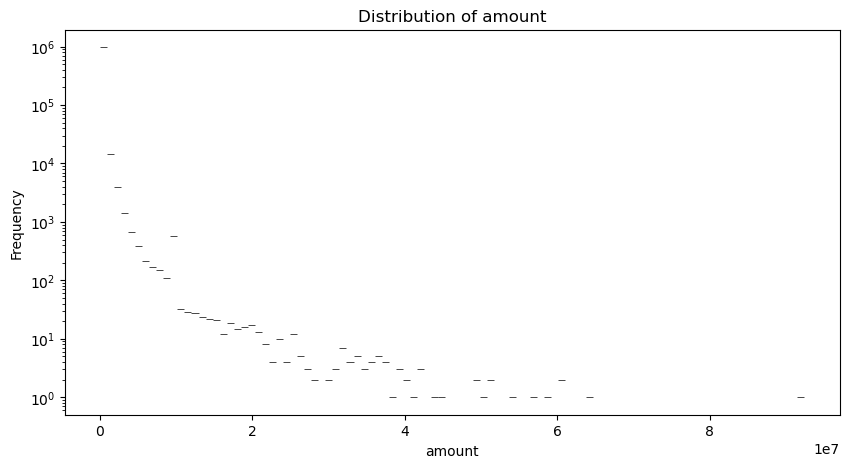

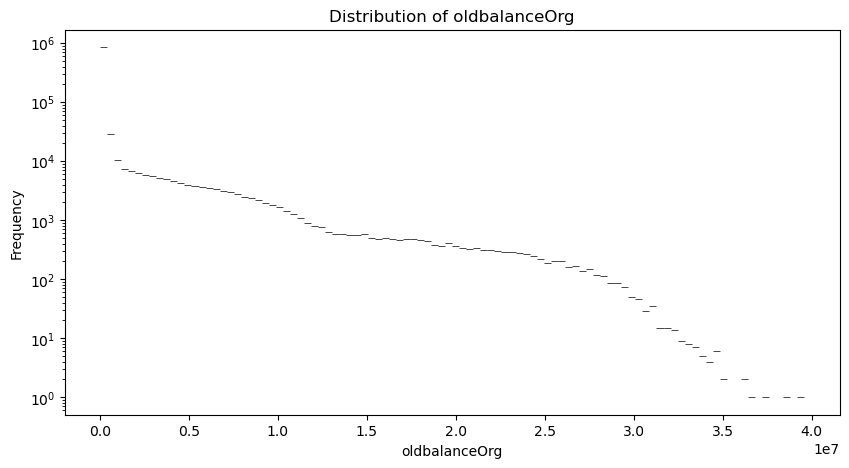

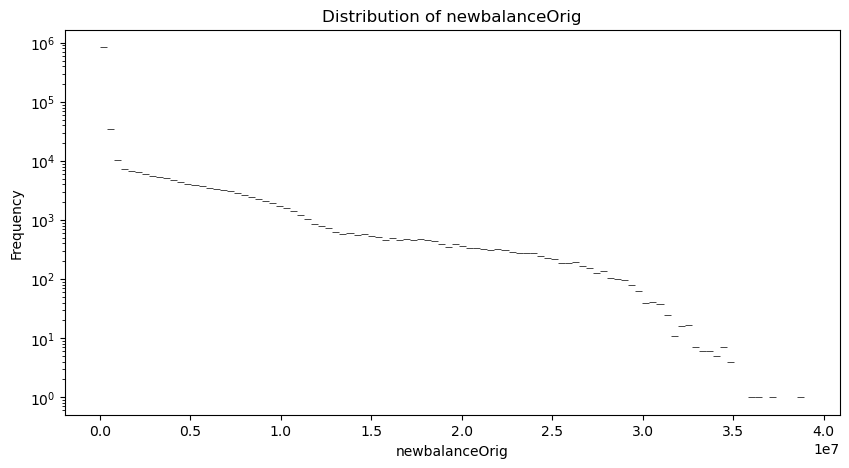

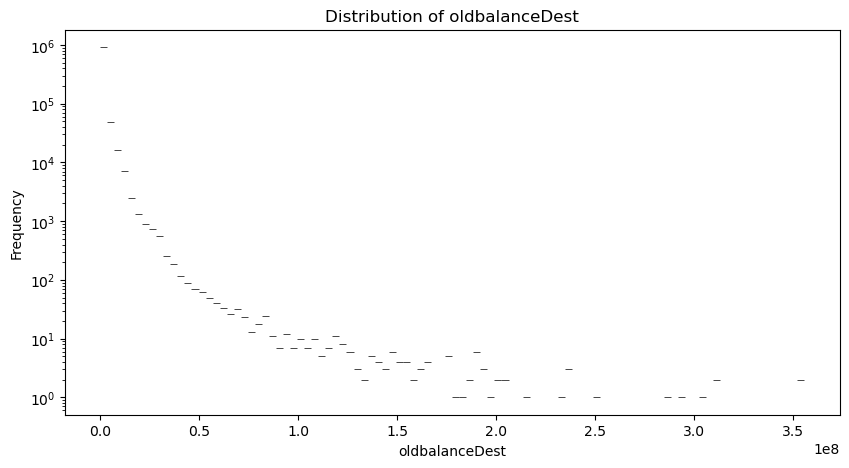

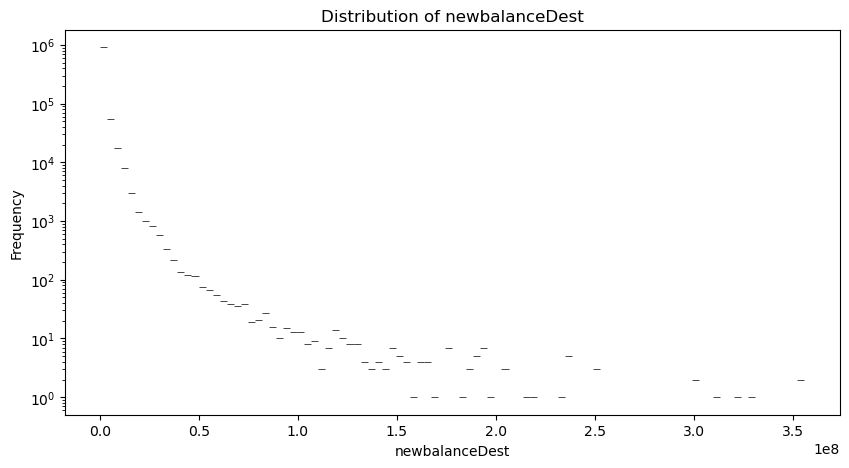

In [ ]:
numeric_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(banktransactions[col], bins=100, log_scale=(False, True))
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### Q1

Take a closer look at the numeric features in your dataset. How are these values distributed and what might this tell you about how most transactions behave compared to a few **rare** ones?

**Hint**: Consider using visualizations that highlight frequency across value ranges.

The data distribution is right-skewed indicated by a high frequency of data closer to 0 involving low transaction amounts and balances. Large balances are rare and may indicate unusual behaviors and can really help with predictions.

### Q2

When comparing different numerical features against one another, do any interesting patterns emerge for transactions marked as fraudulent? Are there particular regions or ranges where these transactions seem to concentrate?

**Hint**: Try comparing two numeric features at a time while distinguishing between fraud and non-fraud. Use visual cues to spot clusters or anomalies.

When comparing amount versus oldbalanceorg, there is a cluster of fradulent points when both the amount and oldbalanceorg is above 10^6 suggesting fradulent activity is more likely to occur in high value transactions.

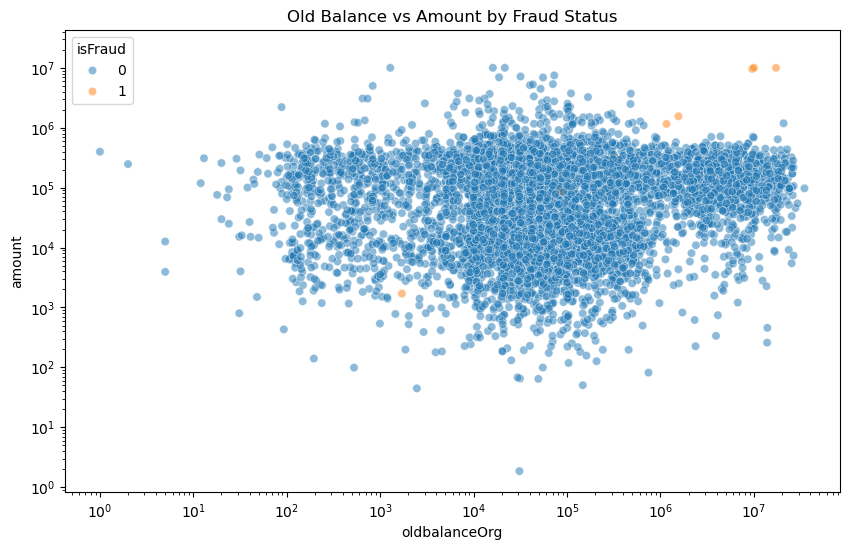

In [ ]:
# Example: amount vs oldbalanceOrg, colored by fraud
plt.figure(figsize=(10, 6))
sns.scatterplot(data=banktransactions.sample(10000), x='oldbalanceOrg', y='amount', hue='isFraud', alpha=0.5)
plt.title('Old Balance vs Amount by Fraud Status')
plt.xscale('log')
plt.yscale('log')
plt.show()

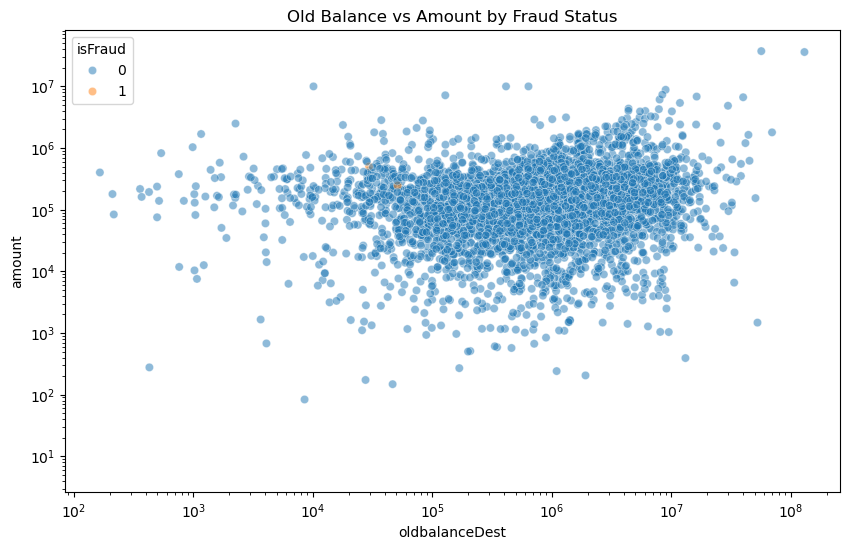

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=banktransactions.sample(10000), x='oldbalanceDest', y='amount', hue='isFraud', alpha=0.5)
plt.title('Old Balance vs Amount by Fraud Status')
plt.xscale('log')
plt.yscale('log')
plt.show()

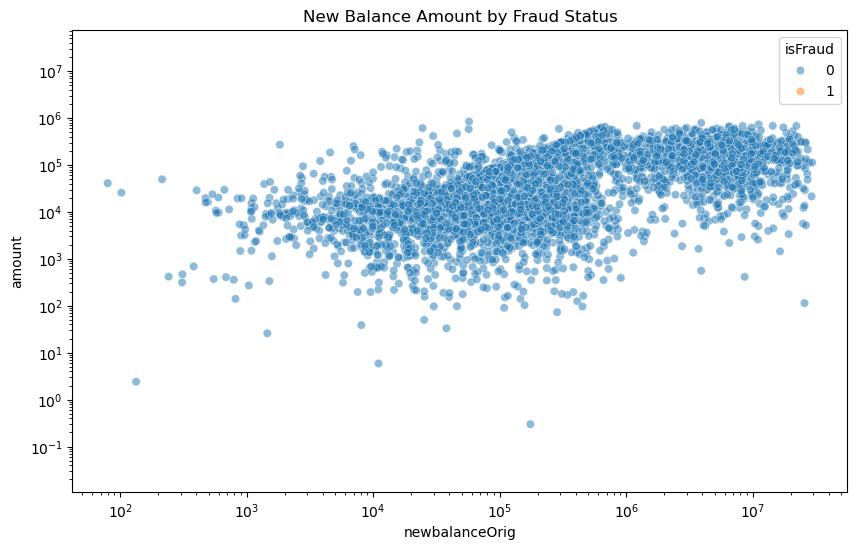

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=banktransactions.sample(10000), x='newbalanceOrig', y='amount', hue='isFraud', alpha=0.5)
plt.title('New Balance Amount by Fraud Status')
plt.xscale('log')
plt.yscale('log')
plt.show()

### Q3

How do types of transaction relate to the typical amounts involved? Are some types of transactions consistently larger or smaller than others?

**Hint**: Break the dataset down by transaction type and compare summary statistics.

CASHOUT and TRANFER data points have the highest mean indicating large amounts withdrawn or moved. On the other hand, DEBIT are smaller. The differences in statistics across categories can help us identify columns to focus on when predicting fraud. 

In [1]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=banktransactions, x='type', y='amount')
plt.title('Transaction Amounts by Type')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()
banktransactions.groupby('type')['amount'].describe()

NameError: name 'plt' is not defined

### Q4

Do transaction amounts vary when you compare fraudulent and non-fraudulent transactions across different transaction types? What patterns emerge when you look at both fraud status and transaction type together?

**Hint**:  Try summarizing average transaction amounts by both fraud label and transaction type to compare across categories.

The graphs shows fraud is prevalent in TRANSFERS and CASHOUT types and significantly higher than non-fradulent transactions. In contrast, DEBIT, PAYMENT or CASHIN have no or very little fraud activity. 

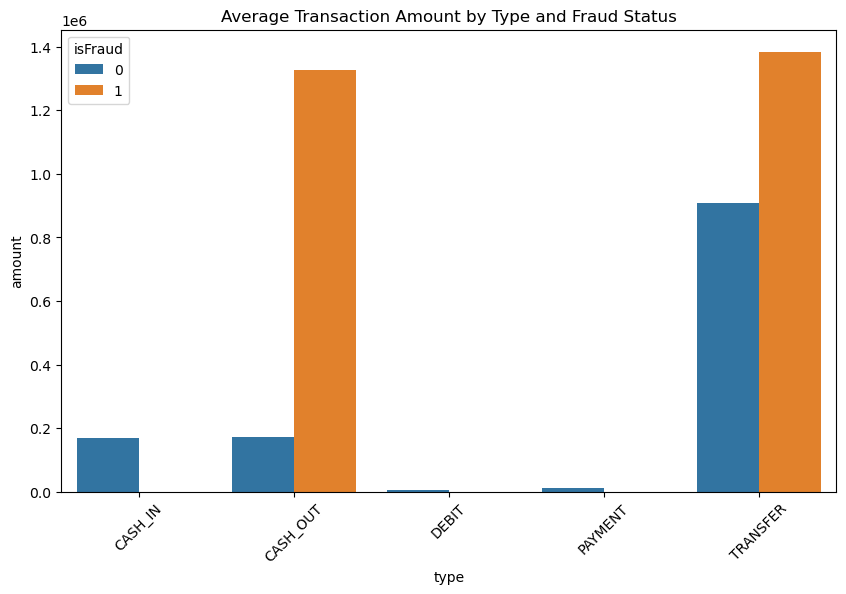

In [ ]:
# Average amount by type and fraud status
fraud_amounts = banktransactions.groupby(['type', 'isFraud'])['amount'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=fraud_amounts, x='type', y='amount', hue='isFraud')
plt.title('Average Transaction Amount by Type and Fraud Status')
plt.xticks(rotation=45)
plt.show()

## Q5

Consider how well the system's built-in fraud flag (`isFlaggedFraud`) aligns with actual fraudulent activity. Are there mismatches? What does this tell you about the system's current performance?

**Hint**: Try organizing the data in a way that shows how often flagged transactions are truly fraudulent and how often fraud goes unflagged.

Only a few transactions are marked as flaggedfraud which may suggest that only some frauds were caught and others were missed.

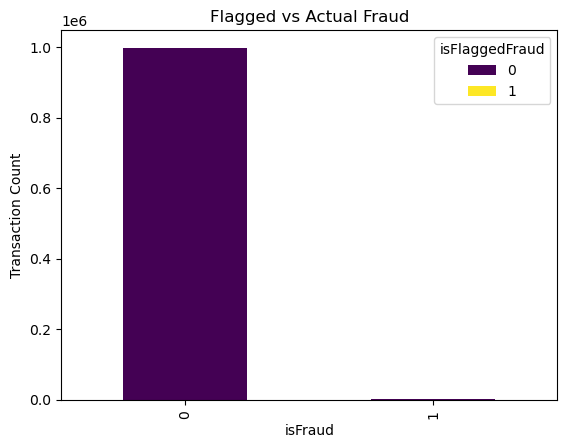

In [ ]:
pd.crosstab(banktransactions['isFraud'], banktransactions['isFlaggedFraud'], margins=True, normalize='index')

cross = pd.crosstab(banktransactions['isFraud'], banktransactions['isFlaggedFraud'])
cross.plot(kind='bar', stacked=True, colormap='viridis', title='Flagged vs Actual Fraud')
plt.xlabel('isFraud')
plt.ylabel('Transaction Count')
plt.legend(title='isFlaggedFraud')
plt.show()